In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


# importing required libraries for the process.

In [134]:
df=pd.read_csv(r"C:\Users\lucky\OneDrive\Desktop\datascience\p2\bike_rent.csv")
df
# loaded the data with the help of pandas.

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [135]:
df.shape
# It will display no of rows and no of columns present in the dataset.

(17379, 17)

In [136]:
df.columns
# It will display column names present in the dataset.

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [137]:
df.head()
# Top rows will be displayed from dataset.

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [138]:
df.tail()
# Bottom rows will be displayed from the dataset.

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,springer,2012,12,23,No,1,?,Clear,0.26,0.2727,0.65,0.1343,12,37,49


In [139]:
df.info()
# info gives brife information about the dataset like data types, non null values, memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [140]:
df.dtypes
# It will display data types of every column in the dataset.

instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

In [141]:
df.describe()
# it will describe the information of dataset like count, mean, minimum, maximum, standed deviation.  

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


In [142]:
df.isnull().sum()
# Checking for the null values in the dataset.

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [143]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df
# Converting date column to a pandas date column.

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,2011-01-01,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,2011-01-01,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,2011-01-01,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,2011-01-01,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,2012-12-31,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,2012-12-31,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,2012-12-31,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [144]:
df.replace('?', np.nan, inplace=True)
cat_cols=df.columns
for col in cat_cols:
    print(col)
    print(df[col].unique())
    print("-" * 30)

# Replacing '?' with NaN across the dataframe.
# Checking whether the changes are applied or not

instant
[    1     2     3 ... 17377 17378 17379]
------------------------------
dteday
<DatetimeArray>
['2011-01-01 00:00:00', '2011-01-02 00:00:00', '2011-01-03 00:00:00',
 '2011-01-04 00:00:00', '2011-01-05 00:00:00', '2011-01-06 00:00:00',
 '2011-01-07 00:00:00', '2011-01-08 00:00:00', '2011-01-09 00:00:00',
 '2011-01-10 00:00:00',
 ...
 '2012-12-22 00:00:00', '2012-12-23 00:00:00', '2012-12-24 00:00:00',
 '2012-12-25 00:00:00', '2012-12-26 00:00:00', '2012-12-27 00:00:00',
 '2012-12-28 00:00:00', '2012-12-29 00:00:00', '2012-12-30 00:00:00',
 '2012-12-31 00:00:00']
Length: 731, dtype: datetime64[ns]
------------------------------
season
['springer' nan 'summer' 'fall' 'winter']
------------------------------
yr
['2011' nan '2012']
------------------------------
mnth
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' nan]
------------------------------
hr
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
------------------------------
holiday
['No' 'Yes' na

In [145]:
df.isnull().sum()
# Now we can see null values in the dataset.

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [146]:
df=df.dropna()
# Null values are droped from the dataset.

In [147]:
df.isnull().sum()
# No null values present in the dataset.

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

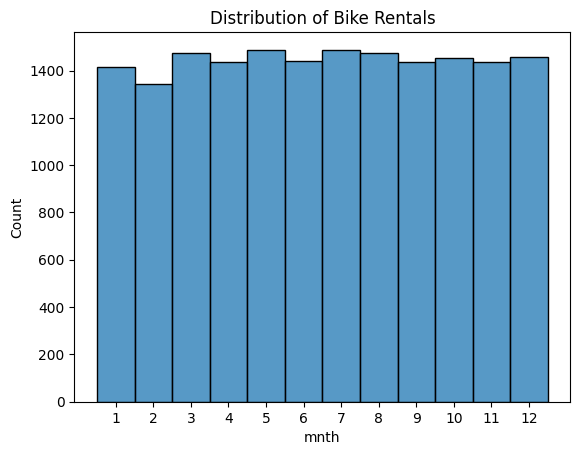

In [148]:
plt.figure()
sns.histplot(df['mnth'], bins=50)
plt.title("Distribution of Bike Rentals")
plt.show()

# The visualization is about which month has the most bikes rented.
# In May, most bikes were rented.
# There is not much difference in months.

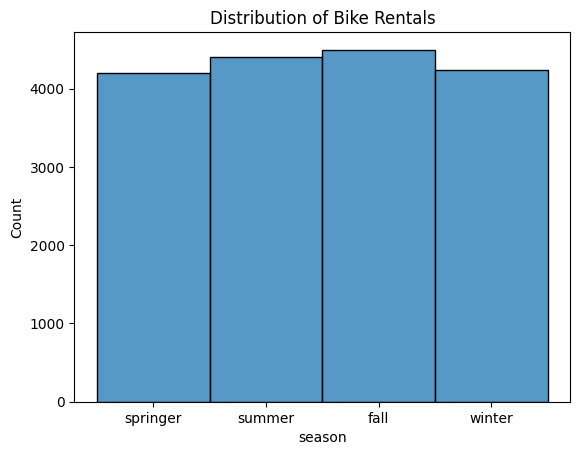

In [149]:
plt.figure()
sns.histplot(df['season'], bins=50)
plt.title("Distribution of Bike Rentals")
plt.show()

# The visualization shows that there is not much difference in the season in rental bikes.

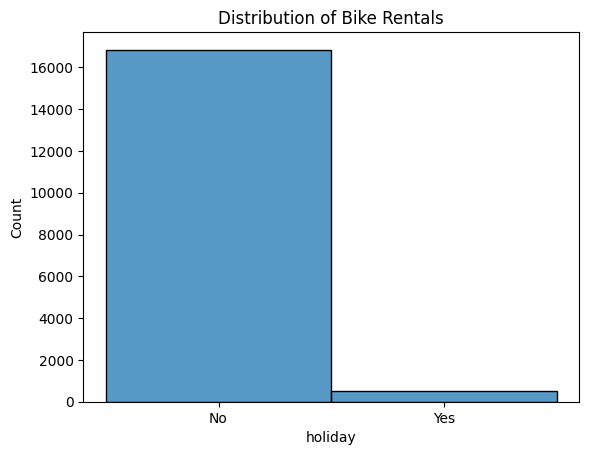

In [150]:
plt.figure()
sns.histplot(df['holiday'], bins=50)
plt.title("Distribution of Bike Rentals")
plt.show()

# Most bikes are rented on non-holiday days.

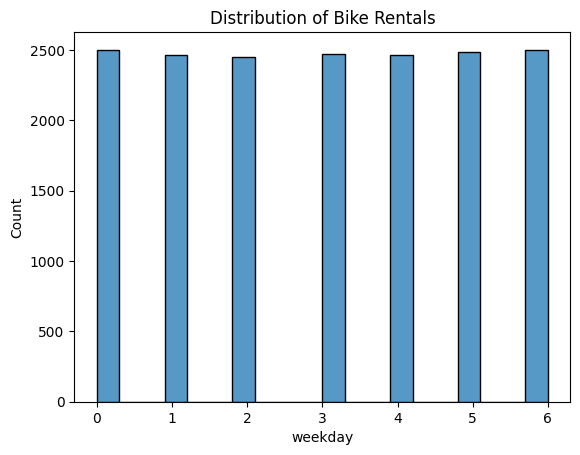

In [151]:
plt.figure()
sns.histplot(df['weekday'])
plt.title("Distribution of Bike Rentals")
plt.show()

# The rental counts across weekdays (0 to 6) are nearly equal, suggesting consistent demand throughout the week.
# This implies that bike usage isn't heavily skewed toward weekends or weekdays, which is atypical for many urban mobility patterns.

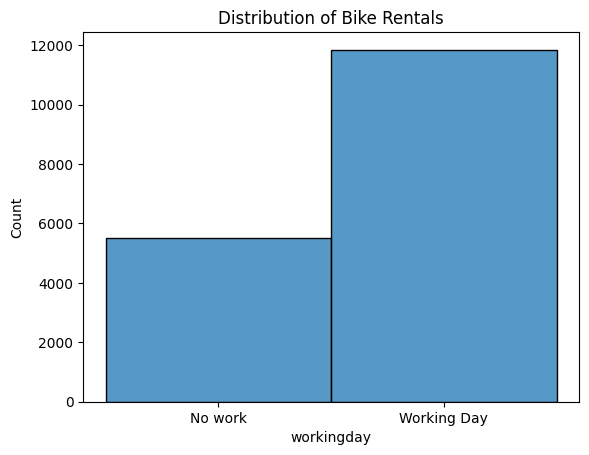

In [152]:
plt.figure()
sns.histplot(df['workingday'], bins=50)
plt.title("Distribution of Bike Rentals")
plt.show()

# Most of the bikes are rented on working days.

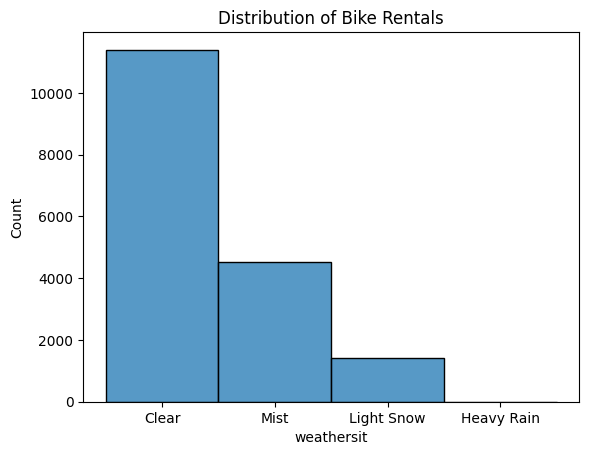

In [153]:
plt.figure()
sns.histplot(df['weathersit'], bins=50)
plt.title("Distribution of Bike Rentals")
plt.show()

# Weather also affects the bike rentals.
# The highest rental counts occur during clear conditions, which is expected and confirms user preference for favorable riding conditions.
# Rentals during misty weather remain relatively high, suggesting that light atmospheric disturbances don’t deter riders significantly.
# Light snow and heavy rain show a steep drop in rentals, with heavy rain being the least favorable. This aligns with safety concerns and comfort levels.

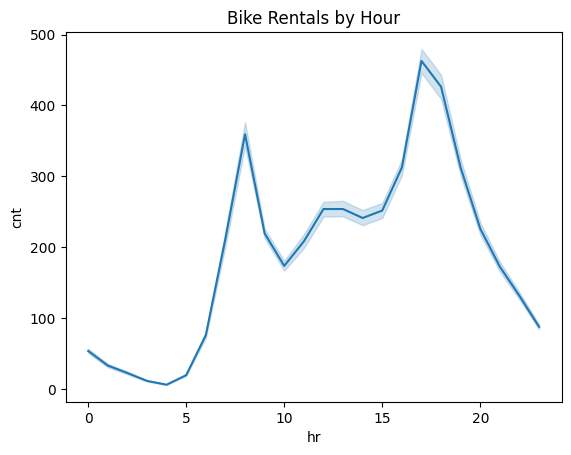

In [154]:
plt.figure()
sns.lineplot(x='hr', y='cnt', data=df)
plt.title("Bike Rentals by Hour")
plt.show()

# The visualization is a line plot.
# In which hours are the bikes taken for rental?
# In between 16-18(4-6) hours the bike rented. 

In [155]:
cat_cols = ['season', 'holiday', 'workingday', 'weathersit']

for col in cat_cols:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])
df

# Converting categorical values to numerical values.
# Label encoder used for converting categorical to numerical.

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,0,0.24,0.2879,0.81,0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,0,0.22,0.2727,0.8,0,8,32,40
3,4,2011-01-01,1,2011,1,3,0,6,0,0,0.24,0.2879,0.75,0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,0,0.24,0.2879,0.75,0,0,1,1
5,6,2011-01-01,1,2011,1,5,0,6,0,3,0.24,0.2576,0.75,0.0896,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,17371,2012-12-31,1,2012,12,15,0,1,1,3,0.28,0.2879,0.45,0.1343,69,246,315
17373,17374,2012-12-31,1,2012,12,18,0,1,1,3,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,2012,12,19,0,1,1,3,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,2012-12-31,1,2012,12,20,0,1,1,3,0.26,0.2576,0.6,0.1642,8,81,89


In [156]:
df.dtypes
# Checking column datatypes.

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
hr                     int64
holiday               object
weekday                int64
workingday            object
weathersit            object
temp                  object
atemp                 object
hum                   object
windspeed             object
casual                object
registered            object
cnt                    int64
dtype: object

In [157]:
cat_cols = ['season', 'yr', 'mnth', 'casual', 'registered', 'holiday', 'workingday', 'weathersit']

for col in cat_cols:
    df[col] = df[col].astype(int)

df
# Converting categorical columns to numeric.

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,0,0.24,0.2879,0.81,0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,0,0.22,0.2727,0.8,0,8,32,40
3,4,2011-01-01,1,2011,1,3,0,6,0,0,0.24,0.2879,0.75,0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,0,0.24,0.2879,0.75,0,0,1,1
5,6,2011-01-01,1,2011,1,5,0,6,0,3,0.24,0.2576,0.75,0.0896,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,17371,2012-12-31,1,2012,12,15,0,1,1,3,0.28,0.2879,0.45,0.1343,69,246,315
17373,17374,2012-12-31,1,2012,12,18,0,1,1,3,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,2012-12-31,1,2012,12,19,0,1,1,3,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,2012-12-31,1,2012,12,20,0,1,1,3,0.26,0.2576,0.6,0.1642,8,81,89


In [158]:
# Converting weather columns to numeric (handling invalid values)
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [159]:
df.corr(numeric_only=True)
# It displays the correlation between two columns.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.156153,0.865992,0.485942,-0.005055,0.013786,0.002915,-0.005036,0.002041,0.138155,0.139740,0.009285,-0.075113,0.159106,0.283408,0.279752
season,0.156153,1.000000,-0.006387,0.326571,-0.001240,0.015257,-0.010015,-0.007652,0.074488,-0.363909,-0.337130,0.082841,-0.008874,-0.064952,0.004614,-0.013810
yr,0.865992,-0.006387,1.000000,-0.014204,-0.004021,0.006133,-0.003605,-0.003140,-0.003182,0.041747,0.040128,-0.083917,-0.008903,0.143112,0.254258,0.251079
mnth,0.485942,0.326571,-0.014204,1.000000,-0.006027,0.017628,0.011873,-0.004998,0.010345,0.203789,0.210359,0.164705,-0.136210,0.068873,0.122916,0.121294
hr,-0.005055,-0.001240,-0.004021,-0.006027,1.000000,0.001695,-0.003263,0.001527,-0.043306,0.138133,0.134350,-0.276567,0.136776,0.301601,0.374604,0.394596
holiday,0.013786,0.015257,0.006133,0.017628,0.001695,1.000000,-0.101483,-0.251416,-0.007579,-0.025147,-0.028783,-0.011482,0.004744,0.032919,-0.046132,-0.029545
weekday,0.002915,-0.010015,-0.003605,0.011873,-0.003263,-0.101483,1.000000,0.036997,0.003512,-0.002482,-0.009553,-0.037595,0.011040,0.032480,0.021553,0.026816
workingday,-0.005036,-0.007652,-0.003140,-0.004998,0.001527,-0.251416,0.036997,1.000000,0.038608,0.054931,0.054230,0.016180,-0.011765,-0.302044,0.133632,0.029387
weathersit,0.002041,0.074488,-0.003182,0.010345,-0.043306,-0.007579,0.003512,0.038608,1.000000,-0.092921,-0.092083,0.346062,-0.020334,-0.120918,-0.078423,-0.098318
temp,0.138155,-0.363909,0.041747,0.203789,0.138133,-0.025147,-0.002482,0.054931,-0.092921,1.000000,0.987649,-0.069647,-0.023301,0.459271,0.334416,0.403930


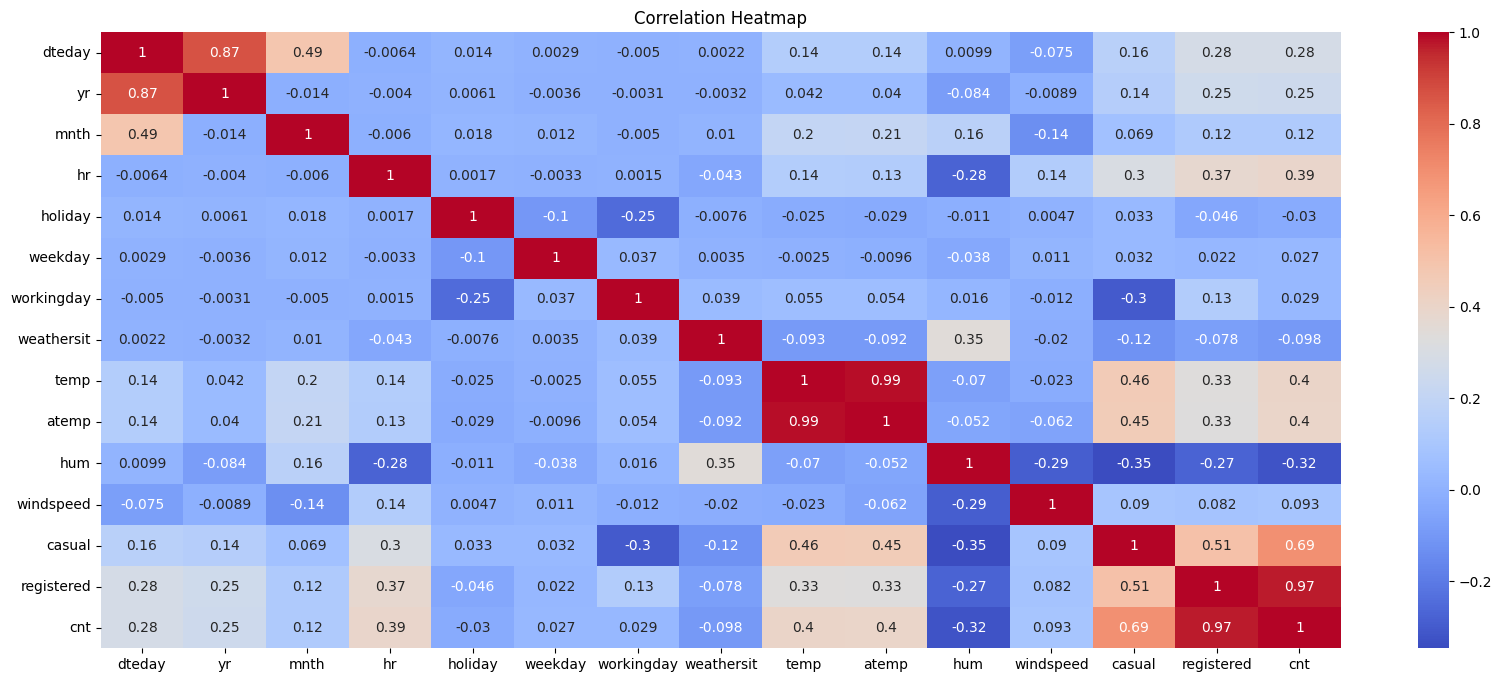

In [160]:
plt.figure(figsize=(20,8))
corr_matrix = df.drop(columns=['instant', 'season']).corr()
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True)
plt.title("Correlation Heatmap")
plt.show()

# The cnt has a strong correlation with temp, atemp, and hr.
# hum is a strong negative correlation.

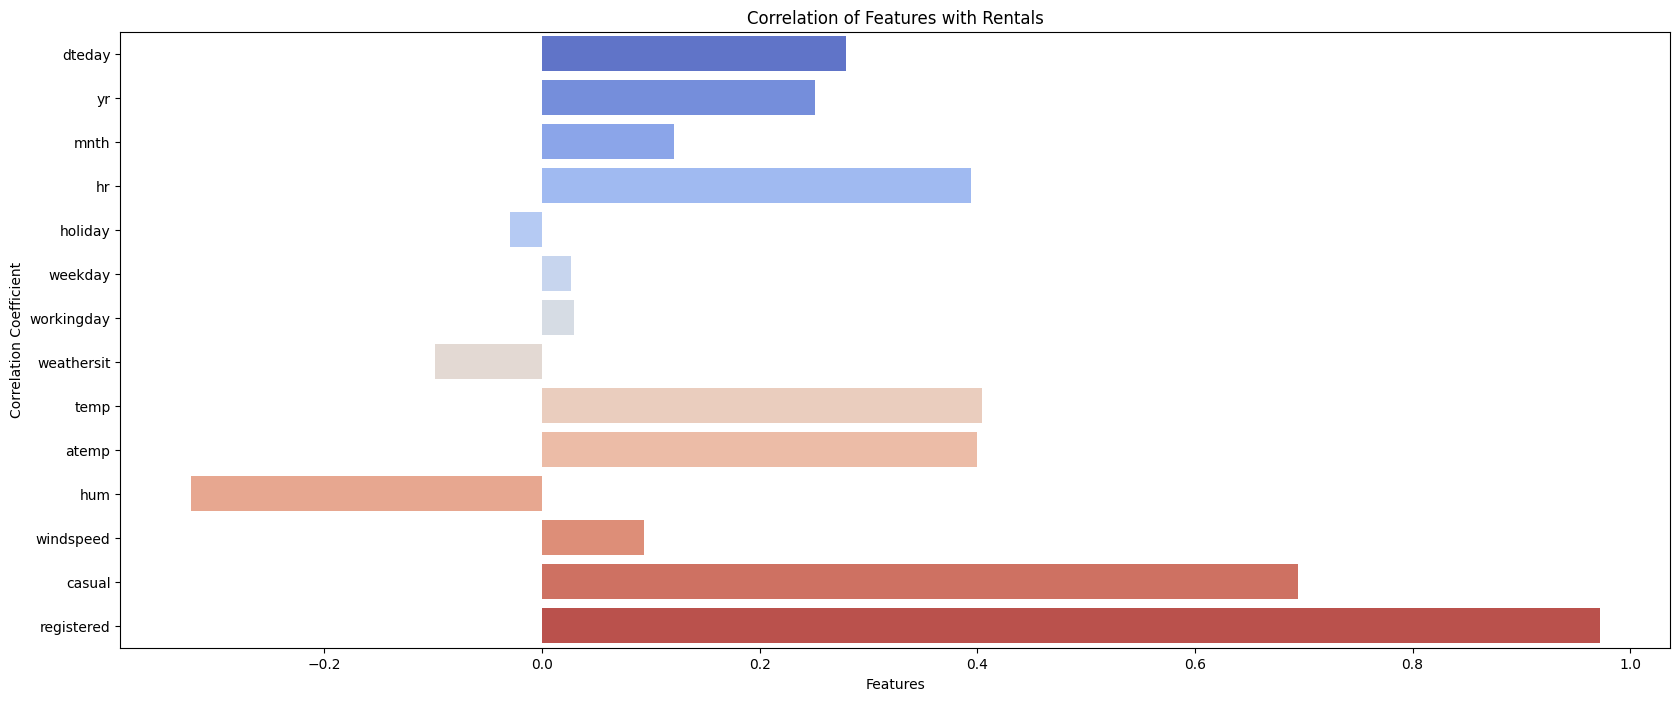

In [161]:
corr_matrix = df.drop(columns=['instant', 'season']).corr()
rental_corr = corr_matrix['cnt'].drop(['cnt'])

plt.figure(figsize=(20,8))
sns.barplot(x=rental_corr.values, y=rental_corr.index, orient='h', palette='coolwarm')
plt.title("Correlation of Features with Rentals")
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()



In [162]:
feature = ['yr', 'hr', 'weekday', 'workingday', 'holiday', 'mnth', 'temp', 'hum', 'windspeed', 'weathersit']
x=df[feature]
y=df['cnt']

# Casual and registered user counts were excluded from the feature set because they directly contribute to the target variable (cnt). 
# Including them would result in data leakage, leading to overly optimistic performance that would not generalize to real-world predictions.

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Training the data 

# StandardScaler is used to normalize feature values
scaler = StandardScaler()

# Fit scaler on training data and transform both train & test data
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [164]:

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

grid_search_xgb.fit(x_train, y_train)

print("Best Parameters:", grid_search_xgb.best_params_)
print("Best CV MAE:", -grid_search_xgb.best_score_)

best_xgb = grid_search_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(x_test)

print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.8}
Best CV MAE: 24.5363037109375
XGBoost MAE: 23.704790115356445
XGBoost RMSE: 38.584870562542065


In [165]:
import joblib

joblib.dump(best_xgb, "bike_rental_xgb.pkl")

['bike_rental_xgb.pkl']